In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import os

In [2]:
#declare base directories and subfolder
base='C:/Users/Phil/Box Sync/Boorman Lab/Experiments/Latent-Learning/Behavioral Data'
run=7
data_dir=os.path.join(base, 'Run '+str(run))

In [3]:
#load all csvs into a list of dataframe for easy concatornation
dats=[pd.read_csv(os.path.join(data_dir, k)) for k in os.listdir(data_dir) if 'LTR_Task.csv' in k]
daters=pd.concat(dats)

#check to ensure all elements are in contonated df
print(daters.size == np.sum([l.size for l in dats]))

True


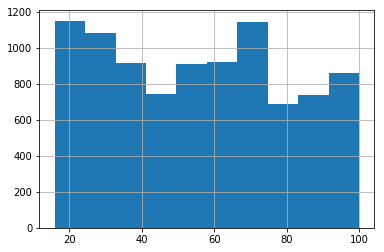

In [5]:
#bin magitute difference scores so we can average RT
daters['magDiff']=np.abs(daters['O1_reward']-daters['O2_reward'])

#histogram to look at the distributions and ensure we apply appropriate cutting 
daters['magDiff'].hist()

bins=np.arange(0,1.2, .2)
bin_labels=np.arange(1, len(bins))

daters['magDiffBins']=pd.qcut(daters['magDiff'], bins, labels=bin_labels)

In [6]:
rt_means=daters.groupby(['PAR', 'magDiffBins'], as_index=False)['Res_time'].mean()

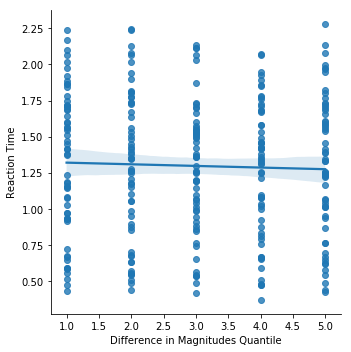

In [7]:
# plot reaction as a function of Magnitude difference quantile
g = sbn.lmplot(x="magDiffBins", y="Res_time",
               truncate=True, size=5, data=rt_means)
g.set_axis_labels("Difference in Magnitudes Quantile", "Reaction Time")
